## Compute Welfares

In [1]:
# Define the various scenarios
N = 100
experiments = [
    dict(name='ces', param='xi', range=(0.2,1.0,N)),
    dict(name='exponential', param='alpha', range=(1,10,N)),
    dict(name='translog', param='alpha', range=(1,10,N))
]

In [2]:
def compute_case(expm):
    '''Evaluates welfare for the planner and the competitive equilibrium for various values of a specified parameter.
    
    Parameters
    ----------
    expm: dict
        Description of the experiment to perform. Contains several fields:
        - name: name of the experiment, the corresponding model file is expected to be model_*name*.yaml
        - param: name of the parameter to change
        - range: set of parameter values (min value, max value, N values)
    Returns
    -------
    df: pandas.DataFrame
        Each line contains:
        - parameter value
        - welfare for the planner optimum
        - welfare for the competitive equilibrium
    '''
        
    
    import pandas
    from dolo import yaml_import
    from numpy import exp, array, linspace, column_stack
    from dolo.algos.perturbations_higher_order import perturbate
    from dolo.algos.simulations import tabulate
    from dolo.algos.steady_state import residuals
    from dolo.algos.steady_state import find_steady_state

    
    case = expm['name']
    param = expm['param']
    range = expm['range']
    
    # create parameter range
    parm_vec = linspace(*range)
        
    # import model and get discount rate
    model = yaml_import('model_{}.yaml'.format(case))
    beta = model.calibration['beta'];
    
    values_ce = []
    values_po = []
    
    # solve all calibrations
    for i in parm_vec:
        
        # Set calibrated parater value
        pp = {param:i}
        model.set_calibration(**pp)
        
        # Solve for the competitive equilibrium
        model.set_calibration(po=0);
        calib = find_steady_state(model);
        dr_ce = perturbate(model, order=2, steady_state=calib);

        # Solve for the social planner equilibrium
        model.set_calibration(po=1);
        calib = find_steady_state(model);
        dr_po = perturbate(model, order=2, steady_state=calib);   
        
                    
            
        # Initial point at which to evaluate the welfare
        eval_point = calib['states'].copy()
        # Change initial value of N
        eval_point[1]*=0.5 # to 50 % of its of its steady-state value
#         eval_point[1]=1    # to 1

        # Evalueate welfare
        w_ce = dr_ce(eval_point)[1]
        w_po = dr_po(eval_point)[1]
        
        # Convert to consumption equivalent
        v_ce = exp((1-beta)*w_ce)
        v_po = exp((1-beta)*w_po)
        
        # Add to list of values
        values_ce.append(v_ce)
        values_po.append(v_po)
    
   
    # Construct dataframe
    columns = [h.format(case) for h in ['{}_'+param, '{}_po', '{}_ce']]
    df = pandas.DataFrame( column_stack([parm_vec, values_po, values_ce]), columns=columns)
    
    return df

In [3]:
# parrallel evaluation (needs 3 workers)
# from IPython.parallel import Client
# rc = Client()
# dviews = rc[:3]
# all_welfares = dviews.map_sync(compute_case, experiments)

In [3]:
# serial evaluation
all_welfares = [compute_case(exp) for exp in experiments]

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [4]:
# Add welfare gains to dataframe
import pandas
df = pandas.concat(all_welfares, axis=1)
# compute gains
for exp in experiments:
    case = exp['name']
    df['{}_gain'.format(case)] = (df['{}_po'.format(case)]/df['{}_ce'.format(case)]-1)*100
# save to Excel
df.to_excel('welfare_gains.xls')
df

,ces_xi,ces_po,ces_ce,exponential_alpha,exponential_po,exponential_ce,translog_alpha,translog_po,translog_ce,ces_gain,exponential_gain,translog_gain
0,0.200000,1.164332,1.132897,1.000000,0.690079,0.690050,1.000000,0.772007,0.760665,2.774785,0.004195,1.491074
1,0.208081,1.180358,1.152172,1.090909,0.701552,0.701525,1.090909,0.780831,0.769831,2.446277,0.003815,1.428962
2,0.216162,1.196917,1.171797,1.181818,0.711795,0.711770,1.181818,0.788680,0.777990,2.143679,0.003495,1.374091
3,0.224242,1.214013,1.191778,1.272727,0.721017,0.720994,1.272727,0.795723,0.785316,1.865649,0.003222,1.325153
4,0.232323,1.231648,1.212122,1.363636,0.729379,0.729357,1.363636,0.802090,0.791944,1.610960,0.002986,1.281148
5,0.240404,1.249828,1.232834,1.454545,0.737008,0.736988,1.454545,0.807883,0.797978,1.378487,0.002781,1.241298
6,0.248485,1.268557,1.253921,1.545455,0.744007,0.743988,1.545455,0.813185,0.803503,1.167196,0.002600,1.204987
7,0.256566,1.287840,1.275390,1.636364,0.750459,0.750441,1.636364,0.818062,0.808588,0.976134,0.002440,1.171719
8,0.264646,1.307684,1.297248,1.727273,0.756432,0.756415,1.727273,0.822568,0.813288,0.804422,0.002298,1.141091
9,0.272727,1.328095,1.319502,1.818182,0.761984,0.761967,1.818182,0.826748,0.817650,0.651247,0.002170,1.112770


## Make plots

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

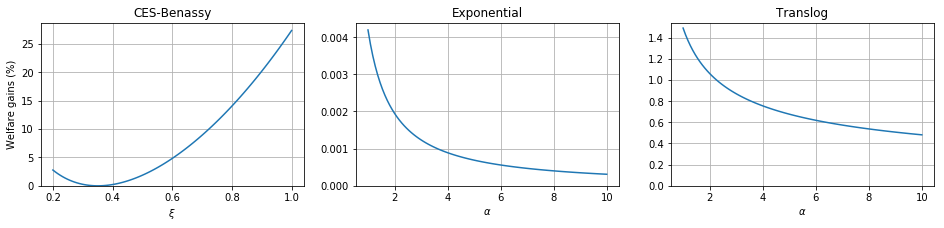

In [6]:
fig = plt.figure(figsize=(16,3))
plt.subplot(131)
plt.plot(df['ces_xi'],df['ces_gain'])
plt.ylabel('Welfare gains (%)')
plt.xlabel("$\\xi$")
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("CES-Benassy")
plt.grid()
# xlim(4,8)
# ylim(0,0.2)
plt.subplot(132)
plt.plot(df['exponential_alpha'],df['exponential_gain'])
plt.grid()
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("Exponential")
plt.xlabel("$\\alpha$")
plt.subplot(133)
plt.plot(df['translog_alpha'],df['translog_gain'])
plt.grid()
yl = plt.ylim()
plt.ylim(0,yl[1])
plt.title("Translog")
plt.xlabel("$\\alpha$")
plt.savefig('BGM_welfare_gains.png')
plt.savefig('BGM_welfare_gains.pdf')
plt.savefig('BGM_welfare_gains.svg')
